In [19]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from acquire import *
from prepare import *

df = prep_titanic(get_titanic_data())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id       891 non-null int64
survived           891 non-null int64
pclass             891 non-null int64
sex                891 non-null object
age                714 non-null float64
sibsp              891 non-null int64
parch              891 non-null int64
fare               891 non-null float64
embarked           891 non-null object
class              891 non-null object
embark_town        891 non-null object
alone              891 non-null int64
embarked_encode    891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [22]:
# Handle missing age values
df.dropna(inplace=True)

X = df[['pclass','age','fare','sibsp','parch']]
y = df.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


In [23]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [24]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [25]:
print(rf.feature_importances_)

[0.32480013 0.13752631 0.37630011 0.07262912 0.08874434]


In [26]:
y_pred = rf.predict(X_train)

In [27]:
y_pred_proba = rf.predict_proba(X_train)

In [28]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.75


In [29]:
print(confusion_matrix(y_train, y_pred))

[[248  45]
 [ 79 127]]


In [30]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80       293
           1       0.74      0.62      0.67       206

   micro avg       0.75      0.75      0.75       499
   macro avg       0.75      0.73      0.74       499
weighted avg       0.75      0.75      0.75       499



In [31]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.74


In [55]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as s

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import *
from prepare import *

df = prep_titanic(get_titanic_data())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id       891 non-null int64
survived           891 non-null int64
pclass             891 non-null int64
sex                891 non-null object
age                714 non-null float64
sibsp              891 non-null int64
parch              891 non-null int64
fare               891 non-null float64
embarked           891 non-null object
class              891 non-null object
embark_town        891 non-null object
alone              891 non-null int64
embarked_encode    891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [34]:
df.dropna(inplace=True)

X = df[['pclass', 'age', 'fare', 'sibsp', 'parch']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=123)

X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


In [35]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [36]:
y_pred = knn.predict(X_train)
y_pred_proba = knn.predict_proba(X_train)

In [38]:
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.76


In [120]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.73


In [40]:
print(confusion_matrix(y_train, y_pred))
cnf = confusion_matrix(y_train, y_pred)

[[239  54]
 [ 65 141]]


In [99]:
def cnf_mtx(tree_cnf_matrix):
    FP = tree_cnf_matrix.sum(axis=0) - np.diag(tree_cnf_matrix)  
    FN = (tree_cnf_matrix.sum(axis=1)) - np.diag(tree_cnf_matrix)
    TP = np.diag(tree_cnf_matrix)
    TN = tree_cnf_matrix.sum() - (FP + FN + TP)

    FP = FP.astype(float)
    FN = FN.astype(float)
    TP = TP.astype(float)
    TN = TN.astype(float)

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    print(f'Recall: {TPR}')
    # Specificity or true negative rate
    TNR = TN/(TN+FP) 
    print(f'True Negative Rate: {TNR}')
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    print(f'Precision: {PPV}')
    # Negative predictive value
    NPV = TN/(TN+FN)
    print(f'Negative Predictive Value: {NPV}')
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    print(f'False positive Rate: {FPR}')
    # False negative rate
    FNR = FN/(TP+FN)
    print(f'False Negative Rate: {FNR}')
    # False discovery rate
    FDR = FP/(TP+FP)
    print(f'False Discovery Rate: {FDR}')
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)
    print(f'Overall Accuracy: {ACC}')
    
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    f2 = [recall[0],recall[1]]
    f2.append(precision[0])
    f2.append(precision[1])
#     print(f2)
    newa = [recall[0],precision[0]]
    newb = [precision[1], precision[1]]
    f1 = s.harmonic_mean(f2)
    f3 = s.harmonic_mean(newa)
    f4 = s.harmonic_mean(newb)
    support = TP + FN
    
    print(f'F1: {f1}')
    print(f'Support: {support}')
    print(f3)
    print(f4)

In [100]:
cnf_mtx(cnf)

Recall: [0.81569966 0.68446602]
True Negative Rate: [0.68446602 0.81569966]
Precision: [0.78618421 0.72307692]
Negative Predictive Value: [0.72307692 0.78618421]
False positive Rate: [0.31553398 0.18430034]
False Negative Rate: [0.18430034 0.31553398]
False Discovery Rate: [0.21381579 0.27692308]
Overall Accuracy: [0.76152305 0.76152305]
F1: 0.748800106657186
Support: [293. 206.]
0.8006700167504187
0.7230769230769231


### k=10

In [116]:
knn10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [118]:
knn10.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=10, p=2,
           weights='uniform')

In [103]:
y_pred10 = knn10.predict(X_train)
y_pred_proba10 = knn10.predict_proba(X_train)

In [104]:
print('Accuracy of KNN10 classifier on training set: {:.2f}'
     .format(knn10.score(X_train, y_train)))

Accuracy of KNN10 classifier on training set: 0.71


In [105]:
print(confusion_matrix(y_train, y_pred))

[[239  54]
 [ 65 141]]


In [106]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn10.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.70


([<matplotlib.axis.XTick at 0x1a24ba3710>,
 <a list of 5 Text xticklabel objects>)

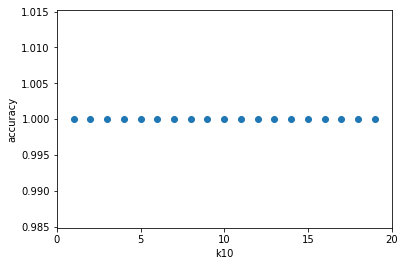

In [183]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k10')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [110]:
knn20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn20.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [111]:
y_pred20 = knn20.predict(X_train)
y_pred_proba20 = knn20.predict_proba(X_train)

In [113]:
print('Accuracy of KNN20 classifier on training set: {:.2f}'
     .format(knn20.score(X_train, y_train)))

Accuracy of KNN20 classifier on training set: 0.71


In [114]:
print('Accuracy of KNN20 classifier on test set: {:.2f}'
     .format(knn20.score(X_test, y_test)))

Accuracy of KNN20 classifier on test set: 0.72


([<matplotlib.axis.XTick at 0x1a241b3cf8>,
 <a list of 5 Text xticklabel objects>)

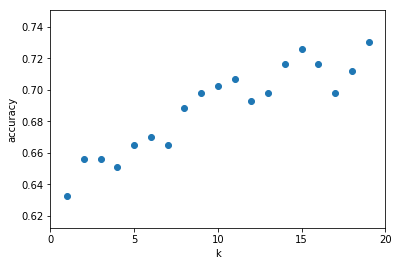

In [119]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [121]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as s

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import *
from prepare import *

df = prep_titanic(get_titanic_data())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
passenger_id       891 non-null int64
survived           891 non-null int64
pclass             891 non-null int64
sex                891 non-null object
age                714 non-null float64
sibsp              891 non-null int64
parch              891 non-null int64
fare               891 non-null float64
embarked           891 non-null object
class              891 non-null object
embark_town        891 non-null object
alone              891 non-null int64
embarked_encode    891 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


In [122]:
df.dropna(inplace=True)

In [123]:
X = df[['pclass', 'age', 'fare', 'sibsp', 'parch']]
y = df.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


In [124]:
rf = RandomForestClassifier(bootstrap=True, class_weight=None,
                            criterion='gini', min_samples_leaf=1,
                            n_estimators=100, max_depth=20, random_state=123)

In [125]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [127]:
print(rf.feature_importances_)

[0.10439494 0.39013442 0.38148822 0.06701136 0.05697105]


In [128]:
y_pred = rf.predict(X_train)
y_pred_proba = rf.predict_proba(X_train)

In [129]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.98


In [132]:
print(confusion_matrix(y_train, y_pred))
rf_mtx = confusion_matrix(y_train, y_pred)

[[291   2]
 [  6 200]]


In [133]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       293
           1       0.99      0.97      0.98       206

   micro avg       0.98      0.98      0.98       499
   macro avg       0.98      0.98      0.98       499
weighted avg       0.98      0.98      0.98       499



In [134]:
cnf_mtx(rf_mtx)

Recall: [0.99317406 0.97087379]
True Negative Rate: [0.97087379 0.99317406]
Precision: [0.97979798 0.99009901]
Negative Predictive Value: [0.99009901 0.97979798]
False positive Rate: [0.02912621 0.00682594]
False Negative Rate: [0.00682594 0.02912621]
False Discovery Rate: [0.02020202 0.00990099]
Overall Accuracy: [0.98396794 0.98396794]
F1: 0.9834071170288263
Support: [293. 206.]
0.9864406779661018
0.9900990099009901


In [135]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.71


In [136]:
rf2 = RandomForestClassifier(bootstrap=True, class_weight=None,
                             criterion='gini', min_samples_leaf=5,
                             n_estimators=100, max_depth=3, random_state=123)

In [137]:
rf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [138]:
print(rf2.feature_importances_)

[0.31756957 0.13479889 0.39019831 0.07086815 0.08656508]


In [140]:
y_pred = rf2.predict(X_train)
y_pred_proba = rf2.predict_proba(X_train)
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf2.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.75


In [141]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf2.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.74


### KNN Iris

In [165]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as s

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import *
from prepare import *

df = prep_iris(get_iris_data())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 6 columns):
species           150 non-null object
sepal_length      150 non-null float64
sepal_width       150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
species_encode    150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [166]:
df.dropna(inplace=True) # handle missing age values

X = df[['sepal_length','sepal_width','petal_length','petal_width','species_encode']]
y = df[['species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width,species_encode
114,5.8,2.8,5.1,2.4,2
136,6.3,3.4,5.6,2.4,2
53,5.5,2.3,4.0,1.3,1
19,5.1,3.8,1.5,0.3,0
38,4.4,3.0,1.3,0.2,0


In [167]:
knn_i5 = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_i10 = KNeighborsClassifier(n_neighbors=10, weights='uniform')
knn_i20 = KNeighborsClassifier(n_neighbors=20, weights='uniform')

In [168]:
knn_i5.fit(X_train, y_train)
knn_i10.fit(X_train, y_train)
knn_i20.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [169]:
y_pred5 = knn_i5.predict(X_train)
y_pred10 = knn_i10.predict(X_train)
y_pred20 = knn_i20.predict(X_train)

y_pred_proba5 = knn_i5.predict_proba(X_train)
y_pred_proba10 = knn_i10.predict_proba(X_train)
y_pred_proba20 = knn_i20.predict_proba(X_train)

In [170]:
for i in (knn_i5, knn_i10, knn_i20):
    print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(i.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 1.00
Accuracy of KNN classifier on training set: 0.99
Accuracy of KNN classifier on training set: 0.99


In [171]:
for i in (y_pred5, y_pred10, y_pred20):
    print(f'{confusion_matrix(y_train, i)}\n')


[[32  0  0]
 [ 0 40  0]
 [ 0  0 33]]

[[32  0  0]
 [ 0 40  0]
 [ 0  1 32]]

[[32  0  0]
 [ 0 40  0]
 [ 0  1 32]]



In [172]:
for i in (y_pred5, y_pred10, y_pred20):
    print(f'{classification_report(y_train, i)}\n')


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        33

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.98      1.00      0.99        40
   virginica       1.00      0.97      0.98        33

   micro avg       0.99      0.99      0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       0.98      1.00      0.99        40
   virginica       1.00      0.97      0.98        33

   micro avg      

In [173]:
for i in (knn_i5, knn_i10, knn_i20):
    print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(i.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 1.00
Accuracy of KNN classifier on test set: 1.00
Accuracy of KNN classifier on test set: 1.00


### Random Forest Iris

In [162]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import statistics as s

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import *
from prepare import *

df = prep_iris(get_iris_data())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 6 columns):
species           150 non-null object
sepal_length      150 non-null float64
sepal_width       150 non-null float64
petal_length      150 non-null float64
petal_width       150 non-null float64
species_encode    150 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [164]:
df.dropna(inplace=True) # handle missing age values

X = df[['sepal_length','sepal_width','petal_length','petal_width']]
y = df[['species']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
136,6.3,3.4,5.6,2.4
53,5.5,2.3,4.0,1.3
19,5.1,3.8,1.5,0.3
38,4.4,3.0,1.3,0.2


In [174]:
rfi1 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            n_estimators=100,
                            max_depth=20, 
                            random_state=123)

rfi2 = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [175]:
rfi1.fit(X_train, y_train)
rfi2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [176]:
for i in (rfi1, rfi2):
    print(i.feature_importances_)

[0.05444538 0.00442402 0.29106065 0.24786912 0.40220082]
[0.05592066 0.00371874 0.30585837 0.25594557 0.37855666]


In [180]:
y_pred1 = rfi1.predict(X_train)
y_pred2 = rfi2.predict(X_train)
y_pred_proba1 = rfi1.predict_proba(X_train)
y_pred_proba2 = rfi2.predict_proba(X_train)

In [181]:
for i in (rfi1, rfi2):
    print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(i.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 1.00
Accuracy of random forest classifier on training set: 1.00


In [182]:
for i in (y_pred1, y_pred2):
    print(confusion_matrix(y_train, i))
    print(classification_report(y_train, i))

[[32  0  0]
 [ 0 40  0]
 [ 0  0 33]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        33

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

[[32  0  0]
 [ 0 40  0]
 [ 0  0 33]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        32
  versicolor       1.00      1.00      1.00        40
   virginica       1.00      1.00      1.00        33

   micro avg       1.00      1.00      1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

